In [2]:
import numpy as np
from scipy.optimize import fminbound
import time

# Problem 1
def golden_ratio(f, a, b, niter):
    i = 1
    rho = 0.382
    while i < niter:
        a_prime = a + rho * (b - a)
        b_prime = a + (1 - rho) * (b - a)
        if f(a_prime) >= f(b_prime):
            a = a_prime
        else:
            b = b_prime
        i += 1
    return (a + b)/2

start = time.time()
f = lambda x: np.exp(x) - 4 * x
print(golden_ratio(f, 0, 3, 13))
end = time.time()
print(fminbound(f, 0, 3))            
print('time: '+str(end - start))

1.3873242644286792
1.38629442227
time: 0.0003027915954589844


In [3]:
# Problem 2
from autograd import grad, jacobian
import autograd.numpy as anp
def bisection(f, a, b, niter):
    i = 1
    gradf = grad(f)
    while i < niter:
        x = (a + b)/2
        if gradf(x) > 0:
            b = x
        else:
            a = x
        i += 1
    return (a + b)/2

start1 = time.time()
f = lambda x: anp.exp(x) - 4 * x
print(bisection(f, 0, 3, 10))
end1 = time.time()
print(fminbound(f, 0, 3))            
print('time: '+str(end1 - start1))

1.3857421875
1.38629442227
time: 0.003435850143432617


In [4]:
# Problem 3
def Newton(f, f1, f2, x):
    tol = 1e-10
    i = 0
    max_iter = 3000
    dist = 1
    x0 = x
    while i < max_iter and dist > tol:
        x1 = x0
        x0 = x0 - f1(x0)/f2(x0)
        dist = abs(x1 - x0)
        i += 1
    if i < max_iter:
        return x0
    else:
        raise ValueError

f = lambda x: x ** 2 + np.sin(5 * x)
f1 = lambda x: 2 * x + 5 * np.cos(5 * x)
f2 = lambda x: 2 - 25 * np.sin(5 * x)
print(Newton(f, f1, f2, 1))
print(Newton(f, f1, f2, 0))
print(Newton(f, f1, f2, 5))
print(fminbound(f, 0, 5))

0.871281083076
-1.44731422363
2.01204156806
0.871282015547


Since the funciton oscillates a lot, starting from different initial values yield different local minimum.

-0.163677221182


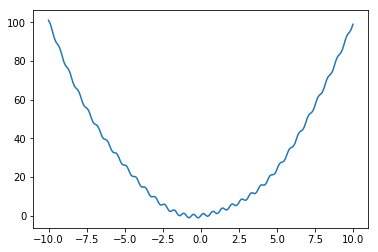

In [5]:
# Problem 4
from matplotlib import pyplot as plt
def secant(f, f1, x0, x1):
    tol = 1e-10
    i = 0
    max_iter = 3000
    dist = 1
    while i < max_iter and dist > tol:
        if float(f1(x1) - f1(x0)) != 0:
            x2 = x1 - ((x1 - x0)/(f1(x1) - f1(x0))) * f1(x1)
            dist = abs(x2 - x1)
            x0 = x1
            x1 = x2
        else:
            print('iteration: '+ str(i)+' encounters 0 in denominator')
            return x1
        i += 1
    return x1
    
f = lambda x: x ** 2 + np.sin(x) + np.sin(10 * x)
f1 = lambda x: 2 * x + np.cos(x) + 10 * np.cos(10 * x)
print(secant(f, f1, 0, -1))
x = np.linspace(-10, 10, 200)
plt.plot(x, f(x))
plt.show()

The curve is very bumpy so the result fo the algorithm depends on initial guesses.

In [7]:
# Problem 5
def backtracking(f, f1, x, p, a=1, rho=.7, c=0.1):
    '''f: function
       f1: derivative 
       x: starting point 
       p: direction 
    '''
    i = 0
    max_iter = 3000
    while f(x + a * p) > f(x) + c * a * np.dot(f1(x), p) and i <max_iter:
        a *= rho
        i += 1
    if i < maxiter:   
        return a
    else:
        raise ValueError